# Kiva dataset
[Link to dataset](https://www.kiva.org/build/data-snapshots)
<img src="kiva_banner.png">
#### About Kiva on their website
More than 1.7 billion people around the world are unbanked and can’t access the financial services they need. Kiva is an international nonprofit, founded in 2005 in San Francisco, with a mission to expand financial access to help underserved communities thrive.

We do this by crowdfunding loans and unlocking capital for the underserved, improving the quality and cost of financial services, and addressing the underlying barriers to financial access around the world. Through Kiva's work, students can pay for tuition, women can start businesses, farmers are able to invest in equipment and families can afford needed emergency care.

By lending as little as $25 on Kiva, you can be part of the solution and make a real difference in someone’s life. 
100% of every dollar you lend on Kiva goes to funding loans.

In [1]:
# Widen width of notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

lenders = pd.read_csv('lenders.csv')
loan_lenders = pd.read_csv('loans_lenders.csv')
loans = pd.read_csv('loans.csv')
print("lenders: ", lenders.shape)
print("loan_lenders: ", loan_lenders.shape)
print("loans: ", loans.shape)

lenders:  (1539526, 14)
loan_lenders:  (1966994, 2)
loans:  (2019262, 34)


In [20]:
loans.head()

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,ACTIVITY_NAME,SECTOR_NAME,LOAN_USE,COUNTRY_CODE,COUNTRY_NAME,TOWN_NAME,CURRENCY_POLICY,CURRENCY_EXCHANGE_COVERAGE_RATE,CURRENCY,PARTNER_ID,POSTED_TIME,PLANNED_EXPIRATION_TIME,DISBURSE_TIME,RAISED_TIME,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL,funding_ratio,fully_funded,over_funded
0,1628324,Bekzod,English,"Bekzod is 33 years old and comes from Gonchi, ...","Bekzod is 33 years old and comes from Gonchi, ...",325.0,325.0,funded,2976535.0,NaN,Personal Medical Expenses,Health,to purchase medicines for his mother's medical...,TJ,Tajikistan,Gonchi,shared,0.1,TJS,100.0,2018-10-18 04:29:08.000 +0000,2018-11-20 18:00:02.000 +0000,2018-10-09 07:00:00.000 +0000,2018-11-20 00:43:58.000 +0000,26.0,9,1,1,"#Supporting Family, user_favorite, user_favori...",Bekzod,male,true,monthly,field_partner,1.0,True,False
1,1786318,Ligaya Fritzie,English,Ligaya Fritzie is a hardworking micro-entrepre...,Ligaya Fritzie is a hardworking micro-entrepre...,150.0,150.0,funded,3185699.0,NaN,Personal Housing Expenses,Housing,to build a sanitary toilet for her family,PH,Philippines,"Minglanilla, Cebu",shared,0.1,PHP,145.0,2019-06-24 07:40:16.000 +0000,2019-07-26 22:40:05.000 +0000,2019-05-27 07:00:00.000 +0000,2019-06-27 05:47:39.000 +0000,14.0,5,2,1,"#Eco-friendly, #Health and Sanitation",Ligaya Fritzie,female,true,monthly,field_partner,1.0,True,False
2,436610,Nga,English,Mrs. Nga was born in 1980. She has three child...,NaN,450.0,450.0,funded,1115505.0,NaN,Animal Sales,Agriculture,to increase her chicken sales in the market,VN,Vietnam,Dong Anh- Ha Noi,standard,NaN,VND,85.0,2012-06-12 05:02:22.000 +0000,2012-07-12 15:20:01.000 +0000,2012-05-31 07:00:00.000 +0000,2012-06-12 20:12:36.000 +0000,14.0,16,1,1,NaN,Nga,female,true,monthly,field_partner,1.0,True,False
3,1974552,Hong,English,Hong is 27 years old. She is married and has o...,Hong is 27 years old. She is married and has o...,450.0,450.0,funded,3823769.0,NaN,Personal Housing Expenses,Housing,to build a latrine.,VN,Vietnam,"Le Thuy, Quang Binh",shared,0.1,VND,394.0,2020-06-20 07:57:22.000 +0000,2020-08-31 15:00:23.000 +0000,2020-05-21 07:00:00.000 +0000,2020-07-19 02:02:20.000 +0000,26.0,12,1,1,"user_favorite, #Health and Sanitation, #Parent",Hong,female,true,monthly,field_partner,1.0,True,False
4,1400696,Toriano,English,Toriano is a hardworking father from Tudela. ...,Toriano is a hardworking father from Tudela. ...,400.0,400.0,funded,2669395.0,NaN,Food Production/Sales,Food,to buy whole coconuts to make copra (dried coc...,PH,Philippines,tudela,shared,0.1,PHP,126.0,2017-10-23 08:34:05.000 +0000,2017-11-23 18:40:03.000 +0000,2017-09-23 07:00:00.000 +0000,2017-11-07 01:19:52.000 +0000,15.0,12,1,1,"#Parent, #Vegan",Toriano,male,true,monthly,field_partner,1.0,True,False


In [19]:
loans['funding_ratio'] = loans.FUNDED_AMOUNT / loans.LOAN_AMOUNT
loans['fully_funded'] = loans.funding_ratio >= 1
loans['over_funded'] = loans.funding_ratio > 1

Underfunded loans:  104319


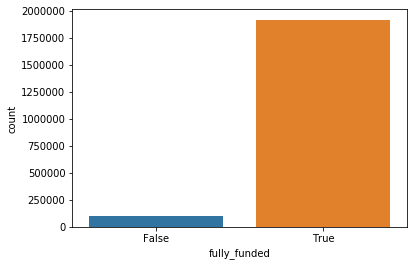

In [27]:
print("Underfunded loans: ", (loans.fully_funded==0).sum())
sns.countplot(x=loans.fully_funded);

In [2]:
lenders.head()

,PERMANENT_NAME,DISPLAY_NAME,MAIN_PIC_ID,CITY,STATE,COUNTRY_CODE,MEMBER_SINCE,PERSONAL_URL,OCCUPATION,LOAN_BECAUSE,OTHER_INFO,LOAN_PURCHASE_NUM,INVITED_BY,NUM_INVITED
0,kimtom8201,Tom,NaN,NaN,NaN,NaN,1605635616,NaN,NaN,NaN,NaN,1,NaN,11
1,deborah6954,Deborah,NaN,NaN,NaN,NaN,1605635211,NaN,NaN,NaN,NaN,1,NaN,0
2,eric1582,Eric,NaN,NaN,NaN,NaN,1605626057,NaN,NaN,NaN,NaN,1,NaN,0
3,yayoi8488,Yayoi,NaN,NaN,NaN,NaN,1605925112,NaN,NaN,NaN,NaN,1,NaN,0
4,daniel51845017,Daniel,NaN,NaN,NaN,NaN,1605633772,NaN,NaN,NaN,NaN,7,NaN,0


In [30]:
lenders.OCCUPATION.value_counts().head(10)

Student              23883
student              13051
teacher               9297
Teacher               7775
Retired               6782
retired               6631
Engineer              5285
Entrepreneur          3004
Consultant            2876
Software Engineer     2212
Name: OCCUPATION, dtype: int64

In [34]:
lenders.CITY.value_counts().head(10)

San Francisco    9181
New York         8501
Toronto          6930
Seattle          6117
Chicago          6115
London           5849
Los Angeles      5583
Portland         4407
Vancouver        4118
Washington       4095
Name: CITY, dtype: int64

In [39]:
# Non-null loan motivation description
print("Count of non-null motivation description: ", lenders.LOAN_BECAUSE.notnull().sum())
print("Percentage of total: ", lenders.LOAN_BECAUSE.notnull().sum()/len(lenders))

Count of non-null motivation description:  151575
Percentage of total:  0.09845562855060584


"My Ivorian wife's grandmother - Madame Madeleine - loaned produce and money to women in the markets in Abidjan."

In [41]:
# Some examples
print(lenders[lenders.LOAN_BECAUSE.notnull()].LOAN_BECAUSE.iloc[0])
print(lenders[lenders.LOAN_BECAUSE.notnull()].LOAN_BECAUSE.iloc[1])
print(lenders[lenders.LOAN_BECAUSE.notnull()].LOAN_BECAUSE.iloc[2])
print(lenders[lenders.LOAN_BECAUSE.notnull()].LOAN_BECAUSE.iloc[3])
print(lenders[lenders.LOAN_BECAUSE.notnull()].LOAN_BECAUSE.iloc[4])

My Ivorian wife's grandmother - Madame Madeleine - loaned produce and money to women in the markets in Abidjan.
I can.
It is easy to do...and makes such a huge impact in the lives of those in need.
There are good people who need help.
To give a Hand  Up and improve lives


In [ ]:
# Can history of loans categories for a lender be also a feature?

In [11]:
# Number of lenders for each loan
loan_lenders['num_lenders'] = loan_lenders.LENDERS.str.split(',').apply(len)

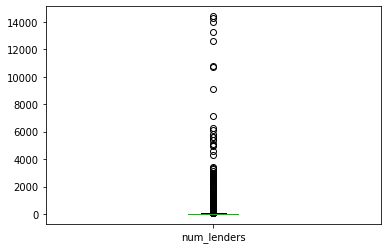

In [14]:
# Some loans attract a lot of lenders
loan_lenders.num_lenders.plot.box()

In [12]:
loan_lenders.head()

,LOAN_ID,LENDERS,num_lenders
0,233239,"sergio2573, janet7717, ridley9296, maureen2394...",73
1,272518,"kevin9872, janpaule5036, BryanMain, BryanMain,...",32
2,335835,"kevin9872, vernon4221, brynyoungblut, joni5291...",30
3,62634,"gary5642, roberta9518, rui6329, jenelle5215, b...",13
4,145399,"kevin9872, baraka4619, dave4725, songbird, con...",16


,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,ACTIVITY_NAME,SECTOR_NAME,LOAN_USE,COUNTRY_CODE,COUNTRY_NAME,TOWN_NAME,CURRENCY_POLICY,CURRENCY_EXCHANGE_COVERAGE_RATE,CURRENCY,PARTNER_ID,POSTED_TIME,PLANNED_EXPIRATION_TIME,DISBURSE_TIME,RAISED_TIME,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
0,1628324,Bekzod,English,"Bekzod is 33 years old and comes from Gonchi, ...","Bekzod is 33 years old and comes from Gonchi, ...",325.0,325.0,funded,2976535.0,NaN,Personal Medical Expenses,Health,to purchase medicines for his mother's medical...,TJ,Tajikistan,Gonchi,shared,0.1,TJS,100.0,2018-10-18 04:29:08.000 +0000,2018-11-20 18:00:02.000 +0000,2018-10-09 07:00:00.000 +0000,2018-11-20 00:43:58.000 +0000,26.0,9,1,1,"#Supporting Family, user_favorite, user_favori...",Bekzod,male,true,monthly,field_partner
1,1786318,Ligaya Fritzie,English,Ligaya Fritzie is a hardworking micro-entrepre...,Ligaya Fritzie is a hardworking micro-entrepre...,150.0,150.0,funded,3185699.0,NaN,Personal Housing Expenses,Housing,to build a sanitary toilet for her family,PH,Philippines,"Minglanilla, Cebu",shared,0.1,PHP,145.0,2019-06-24 07:40:16.000 +0000,2019-07-26 22:40:05.000 +0000,2019-05-27 07:00:00.000 +0000,2019-06-27 05:47:39.000 +0000,14.0,5,2,1,"#Eco-friendly, #Health and Sanitation",Ligaya Fritzie,female,true,monthly,field_partner
2,436610,Nga,English,Mrs. Nga was born in 1980. She has three child...,NaN,450.0,450.0,funded,1115505.0,NaN,Animal Sales,Agriculture,to increase her chicken sales in the market,VN,Vietnam,Dong Anh- Ha Noi,standard,NaN,VND,85.0,2012-06-12 05:02:22.000 +0000,2012-07-12 15:20:01.000 +0000,2012-05-31 07:00:00.000 +0000,2012-06-12 20:12:36.000 +0000,14.0,16,1,1,NaN,Nga,female,true,monthly,field_partner
3,1974552,Hong,English,Hong is 27 years old. She is married and has o...,Hong is 27 years old. She is married and has o...,450.0,450.0,funded,3823769.0,NaN,Personal Housing Expenses,Housing,to build a latrine.,VN,Vietnam,"Le Thuy, Quang Binh",shared,0.1,VND,394.0,2020-06-20 07:57:22.000 +0000,2020-08-31 15:00:23.000 +0000,2020-05-21 07:00:00.000 +0000,2020-07-19 02:02:20.000 +0000,26.0,12,1,1,"user_favorite, #Health and Sanitation, #Parent",Hong,female,true,monthly,field_partner
4,1400696,Toriano,English,Toriano is a hardworking father from Tudela. ...,Toriano is a hardworking father from Tudela. ...,400.0,400.0,funded,2669395.0,NaN,Food Production/Sales,Food,to buy whole coconuts to make copra (dried coc...,PH,Philippines,tudela,shared,0.1,PHP,126.0,2017-10-23 08:34:05.000 +0000,2017-11-23 18:40:03.000 +0000,2017-09-23 07:00:00.000 +0000,2017-11-07 01:19:52.000 +0000,15.0,12,1,1,"#Parent, #Vegan",Toriano,male,true,monthly,field_partner


In [4]:
lenders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539526 entries, 0 to 1539525
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   PERMANENT_NAME     1539526 non-null  object 
 1   DISPLAY_NAME       1537930 non-null  object 
 2   MAIN_PIC_ID        515949 non-null   float64
 3   CITY               544925 non-null   object 
 4   STATE              509520 non-null   object 
 5   COUNTRY_CODE       666559 non-null   object 
 6   MEMBER_SINCE       1539526 non-null  int64  
 7   PERSONAL_URL       48612 non-null    object 
 8   OCCUPATION         336875 non-null   object 
 9   LOAN_BECAUSE       151575 non-null   object 
 10  OTHER_INFO         87644 non-null    object 
 11  LOAN_PURCHASE_NUM  1539526 non-null  int64  
 12  INVITED_BY         415008 non-null   object 
 13  NUM_INVITED        1539526 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 164.4+ MB


In [7]:
lenders.LOAN_BECAUSE.value_counts().tail(100)

I am aware of the struggles of those in deep poverty, and want to reach out to those working to improve their lives.                                       1
I can do anything                                                                                                                                          1
It is something that I can afford to do to help women that need to support their families.                                                                 1
I enjoy supporting independent women who want to provide for their families.                                                                               1
I should do something                                                                                                                                      1
                                                                                                                                                          ..
We loan because we love our neighbors and wish them well. 

In [9]:
loan_lenders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966994 entries, 0 to 1966993
Data columns (total 2 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   LOAN_ID  int64 
 1   LENDERS  object
dtypes: int64(1), object(1)
memory usage: 30.0+ MB


In [10]:
loan_lenders.head()

,LOAN_ID,LENDERS
0,233239,"sergio2573, janet7717, ridley9296, maureen2394..."
1,272518,"kevin9872, janpaule5036, BryanMain, BryanMain,..."
2,335835,"kevin9872, vernon4221, brynyoungblut, joni5291..."
3,62634,"gary5642, roberta9518, rui6329, jenelle5215, b..."
4,145399,"kevin9872, baraka4619, dave4725, songbird, con..."


In [29]:
loan_lenders['list_lenders'] = loan_lenders.LENDERS.apply(lambda x: x.split(', '))
loan_lenders = loan_lenders.explode('list_lenders')


TypeError: drop() got an unexpected keyword argument 'column'

In [30]:
loan_lenders.drop(columns='LENDERS', inplace=True)

In [31]:
loan_lenders

,LOAN_ID,list_lenders
0,233239,sergio2573
0,233239,janet7717
0,233239,ridley9296
0,233239,maureen2394
0,233239,mark3782
...,...,...
1966993,1886674,william6691
1966993,1886674,nancy32794995
1966993,1886674,charles6693
1966993,1886674,damu3758


In [37]:
print(loans[loans.LOAN_ID==233239].DESCRIPTION_TRANSLATED.values)

['The “Cinco de Mayo" group has been together and working with Fundación Paraguaya for more than two years.  The majority of its members are engaged in productive activities already, but the group also includes four women who will learn businesses.\\r\\n\\r\\nThe types of work performed by the members include selling fruits and vegetables; selling traditional foods like meat empanadas, chicken empanadas, ham and cheese empanadas; and selling various merchandise.\\r\\n\\r\\nThey yearn for their children to have a better future, and this is why they strive twice as hard to provide them with the things they need for their development and growth.\\r\\n\\r\\nOne of the members is Ms. Maria, who sells clothing from her home to earn income to help her family.  She has been doing this work for quite a long time, and her children help her with it.  She would like to change up her merchandise for spring, which is just starting in their country.  She is requesting this loan to purchase knit tops,

In [11]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019262 entries, 0 to 2019261
Data columns (total 34 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   LOAN_ID                          int64  
 1   LOAN_NAME                        object 
 2   ORIGINAL_LANGUAGE                object 
 3   DESCRIPTION                      object 
 4   DESCRIPTION_TRANSLATED           object 
 5   FUNDED_AMOUNT                    float64
 6   LOAN_AMOUNT                      float64
 7   STATUS                           object 
 8   IMAGE_ID                         float64
 9   VIDEO_ID                         float64
 10  ACTIVITY_NAME                    object 
 11  SECTOR_NAME                      object 
 12  LOAN_USE                         object 
 13  COUNTRY_CODE                     object 
 14  COUNTRY_NAME                     object 
 15  TOWN_NAME                        object 
 16  CURRENCY_POLICY                  object 
 17  CURRENCY

In [14]:
loans.head()

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,ACTIVITY_NAME,SECTOR_NAME,LOAN_USE,COUNTRY_CODE,COUNTRY_NAME,TOWN_NAME,CURRENCY_POLICY,CURRENCY_EXCHANGE_COVERAGE_RATE,CURRENCY,PARTNER_ID,POSTED_TIME,PLANNED_EXPIRATION_TIME,DISBURSE_TIME,RAISED_TIME,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
0,1628324,Bekzod,English,"Bekzod is 33 years old and comes from Gonchi, ...","Bekzod is 33 years old and comes from Gonchi, ...",325.0,325.0,funded,2976535.0,NaN,Personal Medical Expenses,Health,to purchase medicines for his mother's medical...,TJ,Tajikistan,Gonchi,shared,0.1,TJS,100.0,2018-10-18 04:29:08.000 +0000,2018-11-20 18:00:02.000 +0000,2018-10-09 07:00:00.000 +0000,2018-11-20 00:43:58.000 +0000,26.0,9,1,1,"#Supporting Family, user_favorite, user_favori...",Bekzod,male,true,monthly,field_partner
1,1786318,Ligaya Fritzie,English,Ligaya Fritzie is a hardworking micro-entrepre...,Ligaya Fritzie is a hardworking micro-entrepre...,150.0,150.0,funded,3185699.0,NaN,Personal Housing Expenses,Housing,to build a sanitary toilet for her family,PH,Philippines,"Minglanilla, Cebu",shared,0.1,PHP,145.0,2019-06-24 07:40:16.000 +0000,2019-07-26 22:40:05.000 +0000,2019-05-27 07:00:00.000 +0000,2019-06-27 05:47:39.000 +0000,14.0,5,2,1,"#Eco-friendly, #Health and Sanitation",Ligaya Fritzie,female,true,monthly,field_partner
2,436610,Nga,English,Mrs. Nga was born in 1980. She has three child...,NaN,450.0,450.0,funded,1115505.0,NaN,Animal Sales,Agriculture,to increase her chicken sales in the market,VN,Vietnam,Dong Anh- Ha Noi,standard,NaN,VND,85.0,2012-06-12 05:02:22.000 +0000,2012-07-12 15:20:01.000 +0000,2012-05-31 07:00:00.000 +0000,2012-06-12 20:12:36.000 +0000,14.0,16,1,1,NaN,Nga,female,true,monthly,field_partner
3,1974552,Hong,English,Hong is 27 years old. She is married and has o...,Hong is 27 years old. She is married and has o...,450.0,450.0,funded,3823769.0,NaN,Personal Housing Expenses,Housing,to build a latrine.,VN,Vietnam,"Le Thuy, Quang Binh",shared,0.1,VND,394.0,2020-06-20 07:57:22.000 +0000,2020-08-31 15:00:23.000 +0000,2020-05-21 07:00:00.000 +0000,2020-07-19 02:02:20.000 +0000,26.0,12,1,1,"user_favorite, #Health and Sanitation, #Parent",Hong,female,true,monthly,field_partner
4,1400696,Toriano,English,Toriano is a hardworking father from Tudela. ...,Toriano is a hardworking father from Tudela. ...,400.0,400.0,funded,2669395.0,NaN,Food Production/Sales,Food,to buy whole coconuts to make copra (dried coc...,PH,Philippines,tudela,shared,0.1,PHP,126.0,2017-10-23 08:34:05.000 +0000,2017-11-23 18:40:03.000 +0000,2017-09-23 07:00:00.000 +0000,2017-11-07 01:19:52.000 +0000,15.0,12,1,1,"#Parent, #Vegan",Toriano,male,true,monthly,field_partner


In [15]:
loans[['FUNDED_AMOUNT', 'LOAN_AMOUNT']].describe()

,FUNDED_AMOUNT,LOAN_AMOUNT
count,2.019262e+06,2.019262e+06
mean,7.760960e+02,8.196429e+02
std,1.539199e+03,1.623879e+03
min,0.000000e+00,2.500000e+01
25%,2.500000e+02,2.750000e+02
50%,4.750000e+02,5.000000e+02
75%,9.000000e+02,9.750000e+02
max,5.000000e+05,5.000000e+05


In [16]:
loans.STATUS.value_counts()

funded         1908599
expired          91737
fundRaising       9921
refunded          9005
Name: STATUS, dtype: int64

In [23]:
loans['funding_ratio'] = loans.FUNDED_AMOUNT / loans.LOAN_AMOUNT
loans.funding_ratio.describe()

count    2.019262e+06
mean     9.693551e-01
std      1.439344e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.333333e+00
Name: funding_ratio, dtype: float64

In [22]:
loans.shape

(2019262, 35)

In [20]:
loans[loans.funding_ratio<1].shape

(104319, 35)

In [21]:
loans[loans.funding_ratio<0.5].shape

(64719, 35)

In [ ]:
# Recommender system to match lenders to borrowers to maximise funding ratio

In [25]:
partial_loans = loans[loans.funding_ratio<1]
partial_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104319 entries, 38 to 2019258
Data columns (total 35 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   LOAN_ID                          104319 non-null  int64  
 1   LOAN_NAME                        101244 non-null  object 
 2   ORIGINAL_LANGUAGE                101634 non-null  object 
 3   DESCRIPTION                      101627 non-null  object 
 4   DESCRIPTION_TRANSLATED           95849 non-null   object 
 5   FUNDED_AMOUNT                    104319 non-null  float64
 6   LOAN_AMOUNT                      104319 non-null  float64
 7   STATUS                           104319 non-null  object 
 8   IMAGE_ID                         101634 non-null  float64
 9   VIDEO_ID                         163 non-null     float64
 10  ACTIVITY_NAME                    104319 non-null  object 
 11  SECTOR_NAME                      104319 non-null  object 
 12  